# Where do most software developers live and how happy are they about their jobs?
### According to Stack Overflow Annual Developer Survey

## Table of Contents
<ul>    <li><a href="#intro">Business Understanding</a></li>
    <li><a href="#questions">Data Understanding</a></li>
    <li><a href="#dw">Prepare Data</a></li>
    <li><a href="#eda">Data Modeling</a></li>
    <li><a href="#cz">Evaluate the Results</a></li>
</ul></li>

<a id='intro'></a>
## Business Understanding

In this notebook I will be analysing data from Stack Overflow’s annual Developer Survey, the largest survey of people who code around the world. I am focused on five years of reviews, from 2016 to 2020. In particular, I am interested in finding which are the top three countries for software developers and see how happy they are about their jobs.

<a id='questions'></a>
## Data Understanding

**Q1:** Where do most software developers live? Here, I am interested in finding the top three countries from the Stack Overflow Annual Developer Survey and find a trend throughout the years of interest (2016-2020).

**Q3:** How happy are developers about their jobs?

**Q3:** How happy are software developers from the top three countries over the years? Therefore I want to know if there is a trend or if there are differences between the groups related to happiness.

<a id='dw'></a>
## Prepare Data
1. <a href="#gather">**Gather**</a>: load in the data: download the last five years of Stack Overflow Survey data, 2015-2016 from [here](https://insights.stackoverflow.com/survey)
2. **Asses**: Check for cleanliness - these steps are done in the first notebook, 1_data_gathering.ipynb: 
    * Check the headers for each year;
    * Identify columns of interest for each year: country, job satisfaction
    * Check missing values in our data
3. <a href="#clean">**Clean**</a>: Trim and clean your dataset for analysis.
    * Identify how job satisfaction is defined over the years and find a common scale 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

from IPython import display
%matplotlib inline

<a id='gather'></a>
### Load the data 

In [2]:
PATH_IN = "data_out"

df_2016 = pd.read_csv(os.path.join(PATH_IN, 'data_2016_raw.csv'))
df_2017 = pd.read_csv(os.path.join(PATH_IN, 'data_2017_raw.csv'))
df_2018 = pd.read_csv(os.path.join(PATH_IN, 'data_2018_raw.csv'))
df_2019 = pd.read_csv(os.path.join(PATH_IN, 'data_2019_raw.csv'))
df_2020 = pd.read_csv(os.path.join(PATH_IN, 'data_2020_raw.csv'))

<a id='clean'></a>
### Clean the data

### Map Job Satisfaction for 2016-2020

### #1 2016

In [3]:
def plot_year_job_satisfaction(df, year):
    '''
    INPUT
        df - a dataframe containing percentages of number of respondents for job satofsaction values
        year - year of the survey
    OUTPUT
        A bar chart for job satisfaction distribution of the dataframe 
    '''
    (df['job_satisfaction'].value_counts()/df['job_satisfaction'].shape[0]*100).plot(kind='bar', figsize=(8, 4));
    plt.title(f'Job Satisfaction Distribution {year} (%)');
    plt.xlabel('Job Satisfaction')
    plt.ylabel('Number of respondents (%)')
    plt.show();

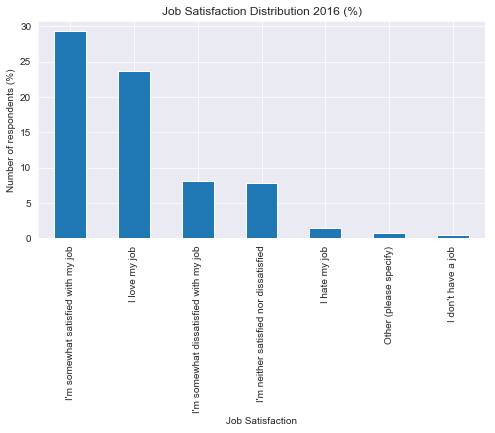

In [4]:
# change dtype
# plot 2016
plot_year_job_satisfaction(df_2016, 2016)

In [5]:
def clean_data(df, map_dict):
    '''
    INPUT
        df - an uncleaned dataframe with different values for job satisfaction
        map_dict - dictionary to map job satifsactior
    OUTPUT
        df - a dataframe with cleaned and remaped job satisfaction values
    '''
    print(f"Missing values for: job satisfaction - {df['job_satisfaction'].isnull().sum()}, country - {df['country'].isnull().sum()}")
    df.dropna(subset=['country'], inplace=True)
    if df['job_satisfaction'].dtype == float:
        df['job_satisfaction'] =  df['job_satisfaction'].fillna(int(df['job_satisfaction'].mean().round()))
        df['job_satisfaction'] = df['job_satisfaction'].astype(int).astype(str)
    print(map_dict)
    df['job_satisfaction'] = df['job_satisfaction'].map(map_dict)
    # fill missing values for mean
    df['job_satisfaction'] =  df['job_satisfaction'].fillna(int(df['job_satisfaction'].mean().round()))
    df = df[['year', 'country', 'job_satisfaction']]
    print(df.info())
    return df

### Handling missing values

We have two different types of variables with missing values:
1. ```country```: for the purpose of this analysis, I will drop rows with no country added because it is difficult to impute a random value for this field. For building a predictive model, we can one hot encode categorical values with missing rows by creating a new missing column with a value of 1;
2. ```job_satisfaction```: for job satisfaction, after mapping the new values for job satisfaction, I will impute null values with the mean job satisfaction.  This method is fast but reduces the variance of the data.

In [6]:
# header dict
job_satisfaction_2016 = {'I love my job': 5,
                        "I'm somewhat satisfied with my job":4, 
                        "I'm neither satisfied nor dissatisfied":3, "I don't have a job":3,
                        "I'm somewhat dissatisfied with my job":2, 
                        "I hate my job":1} 

df_2016 = df_2016.copy()
# clean the dataset
df_2016 = clean_data(df_2016, job_satisfaction_2016)
df_2016.head()

Missing values for: job satisfaction - 15920, country - 502
{'I love my job': 5, "I'm somewhat satisfied with my job": 4, "I'm neither satisfied nor dissatisfied": 3, "I don't have a job": 3, "I'm somewhat dissatisfied with my job": 2, 'I hate my job': 1}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 55528 entries, 0 to 56009
Data columns (total 3 columns):
year                55528 non-null int64
country             55528 non-null object
job_satisfaction    55528 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,year,country,job_satisfaction
0,2016,Afghanistan,4.0
1,2016,Afghanistan,5.0
2,2016,Afghanistan,4.0
3,2016,Afghanistan,5.0
4,2016,Afghanistan,4.0


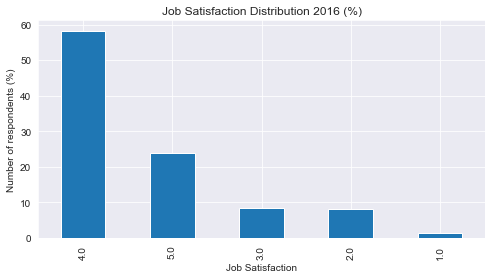

In [7]:
# change dtype
# plot 2016
plot_year_job_satisfaction(df_2016, 2016)

### #2 2017

In [8]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 6 columns):
country              51392 non-null object
coding_experience    51145 non-null object
job_satisfaction     40376 non-null float64
programming_lg       36625 non-null object
salary               12891 non-null float64
year                 51392 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.4+ MB


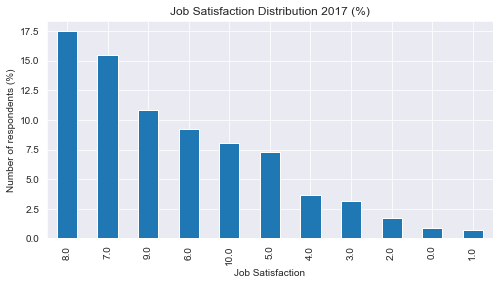

In [9]:
# change dtype
# plot the distribution
plot_year_job_satisfaction(df_2017, 2017)

In [10]:
(df_2017['job_satisfaction'].mean())

6.957078462452943

In [11]:
# header dict
job_satisfaction_2017 = {'10': 5, '9': 5, '8': 5,
                        '6':4, '7':4, 
                        '5':3,
                        '3':2, '4':2,
                        '0':1, '1':1, '2':1} 

df_2017 = df_2017.copy()
# clean the dataset
df_2017 = clean_data(df_2017, job_satisfaction_2017)
df_2017.head()

Missing values for: job satisfaction - 11016, country - 0
{'10': 5, '9': 5, '8': 5, '6': 4, '7': 4, '5': 3, '3': 2, '4': 2, '0': 1, '1': 1, '2': 1}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51392 entries, 0 to 51391
Data columns (total 3 columns):
year                51392 non-null int64
country             51392 non-null object
job_satisfaction    51392 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.6+ MB
None


,year,country,job_satisfaction
0,2017,United States,4
1,2017,United Kingdom,4
2,2017,United Kingdom,5
3,2017,United States,2
4,2017,Switzerland,5


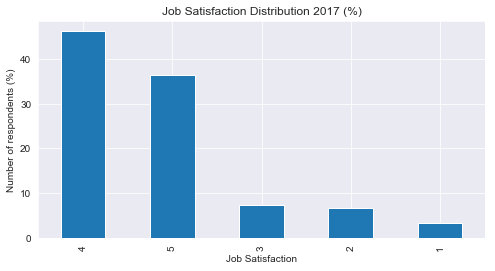

In [12]:
# change dtype
# plot the distribution
plot_year_job_satisfaction(df_2017, 2017)

### #3 2018

In [13]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Data columns (total 6 columns):
country              98443 non-null object
coding_experience    93835 non-null object
job_satisfaction     69276 non-null object
salary               50578 non-null object
programming_lg       78334 non-null object
year                 98855 non-null int64
dtypes: int64(1), object(5)
memory usage: 4.5+ MB


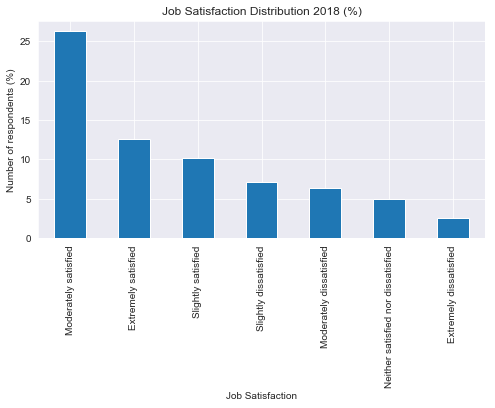

In [14]:
# change dtype
# plot the distribution
plot_year_job_satisfaction(df_2018, 2018)

In [15]:
# header dict
job_satisfaction_2018 = {"Extremely satisfied": 5,
                        "Moderately satisfied":4, "Slightly satisfied":4, 
                        "Neither satisfied nor dissatisfied":3,
                        "Slightly dissatisfied":2, "Moderately dissatisfied":2,
                        "Extremely dissatisfied":1} 

df_2018 = df_2018.copy()
# clean the dataset
df_2018 = clean_data(df_2018, job_satisfaction_2018)
df_2018.head()

Missing values for: job satisfaction - 29579, country - 412
{'Extremely satisfied': 5, 'Moderately satisfied': 4, 'Slightly satisfied': 4, 'Neither satisfied nor dissatisfied': 3, 'Slightly dissatisfied': 2, 'Moderately dissatisfied': 2, 'Extremely dissatisfied': 1}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 98443 entries, 0 to 98854
Data columns (total 3 columns):
year                98443 non-null int64
country             98443 non-null object
job_satisfaction    98443 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ MB
None


,year,country,job_satisfaction
0,2018,Kenya,5.0
1,2018,United Kingdom,2.0
2,2018,United States,4.0
3,2018,United States,3.0
4,2018,South Africa,4.0


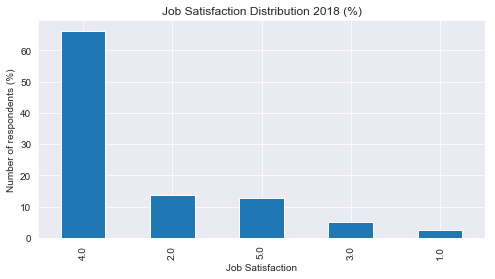

In [16]:
# plot the distribution
plot_year_job_satisfaction(df_2018, 2018)

### #4 2019

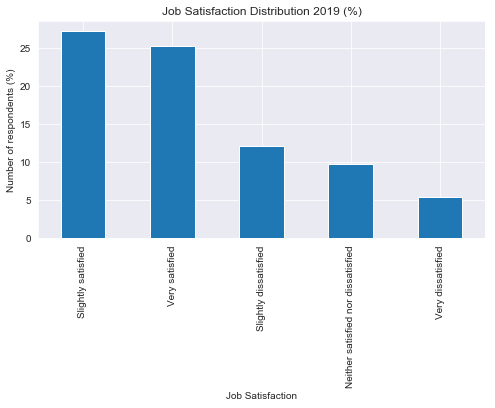

In [17]:
# plot the distribution
plot_year_job_satisfaction(df_2019, 2019)

In [18]:
# header dict
job_satisfaction_2019 = {"Very satisfied":5, 
                        "Slightly satisfied":4,
                        "Neither satisfied nor dissatisfied":3, 
                        "Slightly dissatisfied":2,
                        "Very dissatisfied":1} 

df_2019 = df_2019.copy()
# clean the dataset
df_2019 = clean_data(df_2019, job_satisfaction_2019)
df_2019.head()

Missing values for: job satisfaction - 17895, country - 132
{'Very satisfied': 5, 'Slightly satisfied': 4, 'Neither satisfied nor dissatisfied': 3, 'Slightly dissatisfied': 2, 'Very dissatisfied': 1}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 88751 entries, 0 to 88882
Data columns (total 3 columns):
year                88751 non-null int64
country             88751 non-null object
job_satisfaction    88751 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB
None


,year,country,job_satisfaction
0,2019,United Kingdom,4.0
1,2019,Bosnia and Herzegovina,4.0
2,2019,Thailand,4.0
3,2019,United States,4.0
4,2019,Ukraine,2.0


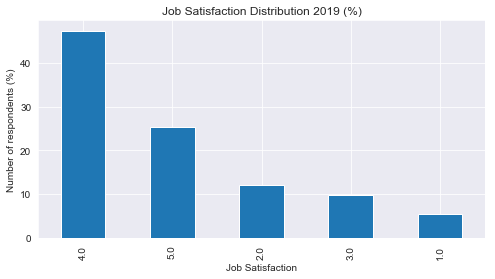

In [19]:
# plot the new distribution
plot_year_job_satisfaction(df_2019, 2019)

### #5 2020

In [20]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 6 columns):
salary               34756 non-null float64
country              64072 non-null object
job_satisfaction     45194 non-null object
programming_lg       57378 non-null object
coding_experience    57684 non-null object
year                 64461 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


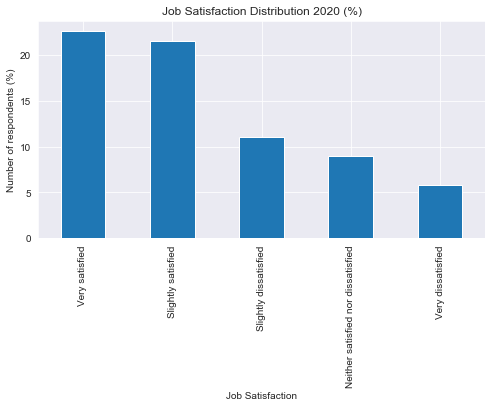

In [21]:
# plot the distribution
plot_year_job_satisfaction(df_2020, 2020)

In [22]:
df_2020 = df_2020.copy()
# clean the dataset
df_2020 = clean_data(df_2020, job_satisfaction_2019)
df_2020.head()

Missing values for: job satisfaction - 19267, country - 389
{'Very satisfied': 5, 'Slightly satisfied': 4, 'Neither satisfied nor dissatisfied': 3, 'Slightly dissatisfied': 2, 'Very dissatisfied': 1}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64072 entries, 0 to 64460
Data columns (total 3 columns):
year                64072 non-null int64
country             64072 non-null object
job_satisfaction    64072 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ MB
None


,year,country,job_satisfaction
0,2020,Germany,4.0
1,2020,United Kingdom,1.0
2,2020,Russian Federation,4.0
3,2020,Albania,2.0
4,2020,United States,4.0


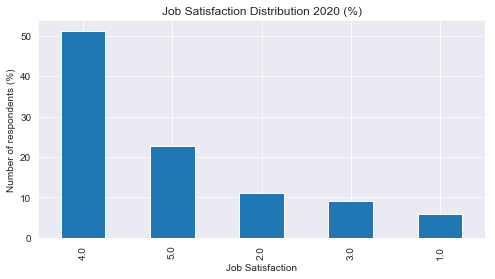

In [23]:
# plot the new distribution
plot_year_job_satisfaction(df_2020, 2020)

<a id='eda'></a>
### Data Modeling

#### Unify clean data for 2016-2020 for job satisfaction and country

In [24]:
# combine our dataframes into a single one
df_all = pd.concat([df_2020, df_2019, df_2018, df_2017, df_2016], ignore_index=True, sort=True)[['year', 'country', 'job_satisfaction']]
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358186 entries, 0 to 358185
Data columns (total 3 columns):
year                358186 non-null int64
country             358186 non-null object
job_satisfaction    358186 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.2+ MB


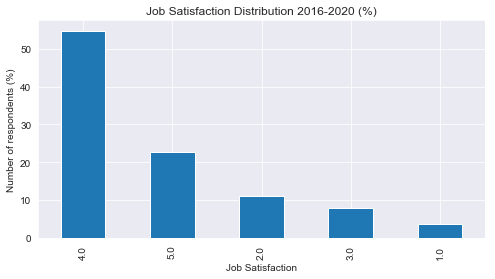

In [25]:
# change dtype
# plot 2016-2020
plot_year_job_satisfaction(df_all, '2016-2020')

In [26]:
(df_all['job_satisfaction'].value_counts()/df_all['job_satisfaction'].shape[0]*100)

4.0    54.725478
5.0    22.727856
2.0    10.954085
3.0    7.784503 
1.0    3.808077 
Name: job_satisfaction, dtype: float64

In [27]:
# shape of the dataset
df_all.shape

(358186, 3)

In [28]:
# unique countries
df_all.country.nunique()

265

In [29]:
# change year columns as datetime
df_all['year'] = pd.to_datetime(df_all["year"].astype(str), format="%Y")

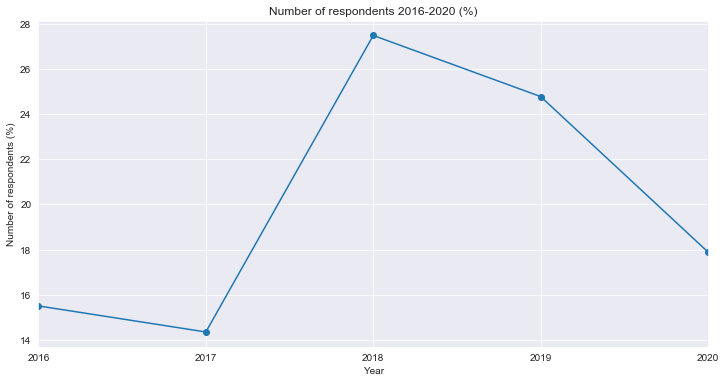

In [30]:
(df_all['year'].value_counts()/df_all.shape[0]*100).sort_index().plot(style='o-', figsize=(12,6))
plt.title(f'Number of respondents 2016-2020 (%)');
plt.xlabel('Year')
plt.ylabel('Number of respondents (%)')
plt.show();

From the above line plot we can see an increa in the number of respondents for 2018 and 2019, with a drop in 2020.

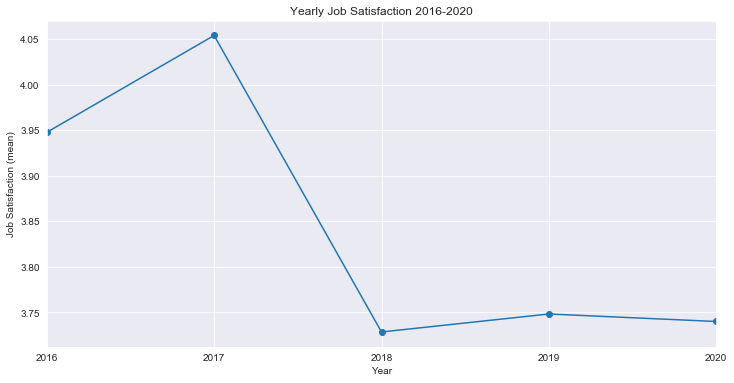

In [31]:
df_all.groupby(by=['year'])['job_satisfaction'].mean().sort_index().plot(style='o-', figsize=(12,6));
plt.title(f'Yearly Job Satisfaction 2016-2020');
plt.xlabel('Year')
plt.ylabel('Job Satisfaction (mean)')
plt.show();

In [32]:
df_all.groupby(by=['year'])['job_satisfaction'].mean()

year
2016-01-01    3.947576
2017-01-01    4.053919
2018-01-01    3.728513
2019-01-01    3.748251
2020-01-01    3.740011
Name: job_satisfaction, dtype: float64

### Q1: Where do most software developers live?
### Top three countries

In [33]:
# group year and country and count the number of countries for each year
s = df_all['country'].groupby(df_all['year']).value_counts()

In [34]:
# get top three countries by year
country_counts = s.groupby(level=[0]).nlargest(3).reset_index(level=[0]).rename(columns={'country':'counts'}).reset_index(level=[1]).reset_index(level=[0], 
                                                                                                                                drop=True)
# unique countries
country_counts.country.unique()

array(['United States', 'United Kingdom', 'India', 'Germany'],
      dtype=object)

In [35]:
country_counts.head()

,country,year,counts
0,United States,2016-01-01,13539
1,United Kingdom,2016-01-01,4573
2,India,2016-01-01,4193
3,United States,2017-01-01,11455
4,India,2017-01-01,5197


To be able to plot these values, we need to manually impute 0 count value for countries with no data.

In [36]:
# uk counts
uk = country_counts[country_counts['country'] == 'United Kingdom']
# append missing values with a count of 0
uk_append = pd.DataFrame()
uk_append = pd.DataFrame({'country': ['United Kingdom', 'United Kingdom'],
                         'year': [pd.to_datetime('2018-01-01'), pd.to_datetime('2019-01-01')], 
                         'counts':[0, 0]})
uk = uk.append(uk_append, ignore_index=True).sort_values(by=['year'])
uk

,country,year,counts
0,United Kingdom,2016-01-01,4573
1,United Kingdom,2017-01-01,4395
3,United Kingdom,2018-01-01,0
4,United Kingdom,2019-01-01,0
2,United Kingdom,2020-01-01,3896


In [37]:
# germany counts
germany = country_counts[country_counts['country'] == 'Germany']
# append missing values with a count of 0
germany_append = pd.DataFrame()
germany_append = pd.DataFrame({'country': ['Germany', 'Germany', 'Germany'],
                         'year': [pd.to_datetime('2016-01-01'), pd.to_datetime('2017-01-01'), pd.to_datetime('2020-01-01')], 
                         'counts':[0, 0, 0]})
germany = germany.append(germany_append, ignore_index=True).sort_values(by=['year'])
germany

,country,year,counts
2,Germany,2016-01-01,0
3,Germany,2017-01-01,0
0,Germany,2018-01-01,6459
1,Germany,2019-01-01,5866
4,Germany,2020-01-01,0


In [38]:
us_counts = country_counts[country_counts['country'] == 'United States']['counts']
india_counts = country_counts[country_counts['country'] == 'India']['counts']
uk_counts = uk['counts']
germany_counts = germany['counts']

ind = np.arange(len(us_counts))  # the x locations for the groups
width = 0.1

labels = [2016, 2017, 2018, 2019, 2020]
locations = ind + width

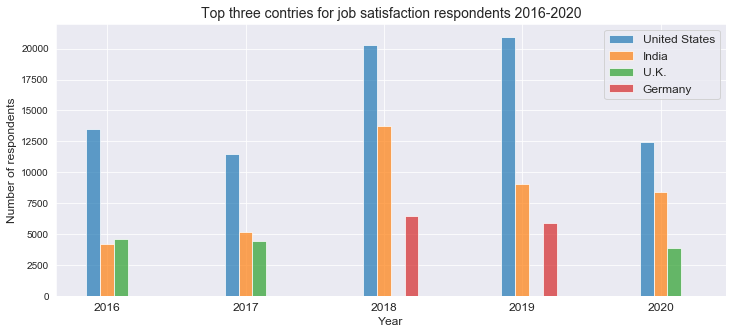

In [39]:
f, ax = plt.subplots(figsize=(12,5))

plt.bar(ind, us_counts, width, alpha=.7, label='United States')
plt.bar(ind + width, india_counts, width, alpha=.7, label='India')
plt.bar(ind + width*2, uk_counts, width, alpha=.7, label='U.K.')
plt.bar(ind + width*3, germany_counts, width, alpha=.7, label='Germany')

# title and label
plt.title('Top three contries for job satisfaction respondents 2016-2020', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of respondents', fontsize = 12)
plt.xticks(locations, labels, fontsize = 12)
ax.legend(fontsize = 12)
plt.show();

We can see that from 2016 to 2020, the United States, United Kingdom, India and Germany are the top three countries where most software developers live. Clearly, the United States has most of the software developers. India is in the second position for 2016-2020. The United Kingdom is the third country with most developers in 2016, 2017 and 2020. Meanwhile, in 2018 and 2019 we have Germany in third place.

In [40]:
# unique countries
top_3_countries = list(country_counts.country.unique())
top_3_countries

['United States', 'United Kingdom', 'India', 'Germany']

### Q2: How happy are software developers from the top three countries over the years? 

In [41]:
df_all_top3 = df_all[df_all['country'].isin(top_3_countries)].reset_index(drop=True)

In [42]:
df_all_top3_meanjs = df_all_top3.groupby(by=['year', 'country'], 
                    as_index=False)['job_satisfaction'].mean().rename(columns={'job_satisfaction':'mean_job_satisfaction'})
df_all_top3_meanjs.head()

,year,country,mean_job_satisfaction
0,2016-01-01,Germany,3.942570
1,2016-01-01,India,3.932268
2,2016-01-01,United Kingdom,3.934179
3,2016-01-01,United States,3.980427
4,2017-01-01,Germany,4.075549


In [43]:
top_3_countries

['United States', 'United Kingdom', 'India', 'Germany']

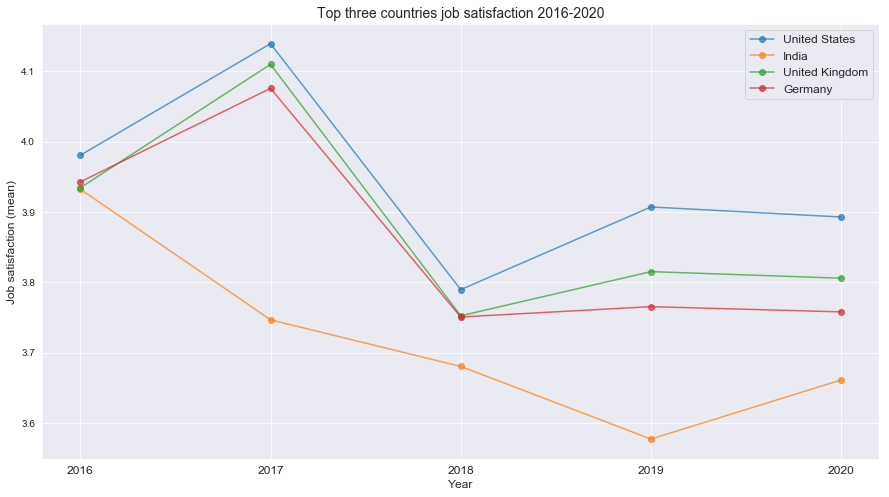

In [44]:
# reorder for consistency
top_3_countries = ['United States', 'India', 'United Kingdom', 'Germany']

# initialise empty dict
country_meanjs_dict = dict()
# for each country add their mean job satisfaction
for country in top_3_countries:
    country_meanjs_dict[country] = list(df_all_top3_meanjs[df_all_top3_meanjs['country'] == country]['mean_job_satisfaction'])
    
f, ax = plt.subplots(figsize=(15,8))
# plot each job satisfaction
for country, mean_js in country_meanjs_dict.items():
    plt.plot(labels, mean_js, alpha=.7, label=country, marker='o')
    
plt.xticks(labels, fontsize = 12)
plt.title('Top three countries job satisfaction 2016-2020', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Job satisfaction (mean)', fontsize = 12)
plt.legend(loc='best', fontsize = 12)
plt.show();

#### From the above line plot, we can identify two different groups related to job satisfaction:

1. Software developers in the United States, United Kingdom and India look very similar according to their job satisfaction. We can see that they have an overall higher satisfaction than software developers from India. They are slightly satisfied towards moderately satisfied, with a mean job satisfaction between 3.7 and almost 4.2. Also, we can see a little decrease in satisfaction from 2017 but it is still in the upper side overall satisfaction.
2. Meanwhile, for software developers from India, we can point a downwards trend of job satisfaction from 2016 to 2019. Also, let’s note that mean satisfaction for India is above 3.5 and we can see in 2020 a slightly increase in job satisfaction.

<a id='cz'></a>
## Evaluate the Results

1. The US, India, UK and Germany are the top three countries software developers live in 2016 to 2020, according to Stack Overflow Annual Developer Survey, the largest survey of people who code around the world.
2. Related to how happy they are as software developers, we found two groups. One from the US, UK and Germany, very similar, they are slightly happy about their jobs. The second group, from India, we identified a slightly downwards trend of job satisfaction from 2016 to 2019, with an increase in 2020. But, they are still above 3.5 job satisfaction, meaning a slightly satisfied view about their job. 